# Explore flight delay data

This notebook replicates the month-delay relationship from NB1 while using general functions.

All categorical variables to predict delay time:
1. Month
2. Day of week 
3. Airline
4. Flight number 
5. Tail number
6. Origin airport 
7. Destination airport
8. scheduled departure hour
9. scheduled arrival hour

Continuous variables to predict delay time:
1. scheduled duration
2. distance


Delay time could be
* Calculate extra in-plane delay (ARRIVAL_DELAY - DEPARTURE_DELAY)
    * From this we could see which airlines speed up the most to make up for lost time
    * Maybe should account for delay by TAXI_OUT time
* Arrival_delay could be an extension in TAXI_IN, TAI_OUT, or AIR_TIME?
    * Reference based on the average TAXI_IN and TAXI_OUT time

In [1]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns
sns.set_style('white')

In [2]:
import util

In [3]:
import imp
imp.reload(util)

<module 'util' from '/gh/flightdelay/nbsc/util.py'>

# Load data

In [4]:
df_SAN = util.load_data_SAN()
print(len(df_SAN))
print(df_SAN.keys())
print(df_SAN.head())

75630
Index(['Unnamed: 0', 'Unnamed: 0.1', 'YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK',
       'AIRLINE', 'FLIGHT_NUMBER', 'TAIL_NUMBER', 'ORIGIN_AIRPORT',
       'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME',
       'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'SCHEDULED_TIME',
       'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON', 'TAXI_IN',
       'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY', 'DIVERTED',
       'CANCELLED', 'CANCELLATION_REASON', 'AIR_SYSTEM_DELAY',
       'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY',
       'WEATHER_DELAY'],
      dtype='object')
     Unnamed: 0  Unnamed: 0.1  YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  \
477         477           477  2015      1    1            4      DL   
500         500           500  2015      1    1            4      OO   
517         517           517  2015      1    1            4      WN   
518         518           518  2015      1    1            4      WN   
520         520           520 

# Relate day of the week to delays

NOTE: 1 is Monday, 7 is Sunday, shown [here](https://www.transtats.bts.gov/FieldInfo.asp?Field_Desc=Day%20of%20Week&Field_Type=Num&Lookup_Table=L_WEEKDAYS&Table_ID=236&SYS_Table_Name=T_ONTIME&Sys_Field_Name=DAY_OF_WEEK)

In [5]:
key_predict = 'DEPARTURE_DELAY'
key_feature = 'DAY_OF_WEEK'

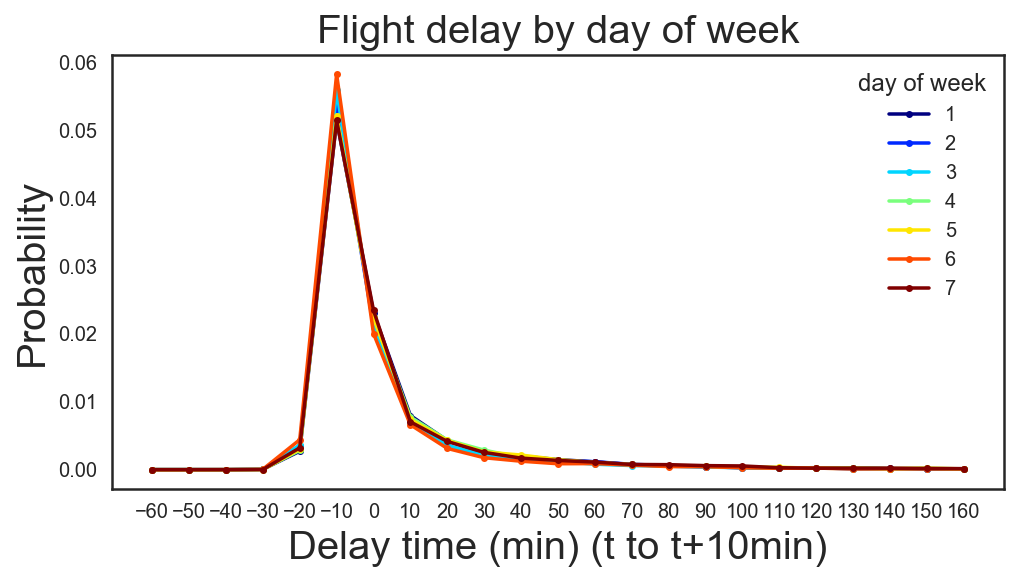

In [6]:
analysis_fn = util.relation_histogram
analysis_kwargs = {'bin_edges':np.arange(-60,180,10)}

plt.figure(figsize=(8,4))
y_by_x_hist, bin_edges = util.relation_explorer(df_SAN, key_predict, key_feature,
                      analysis_fn = analysis_fn, analysis_kwargs = analysis_kwargs)
plt.xlabel('Delay time (min) (t to t+10min)',size=20)
plt.ylabel('Probability', size=20)
plt.title('Flight delay by day of week',size=20)
plt.legend(title='day of week')

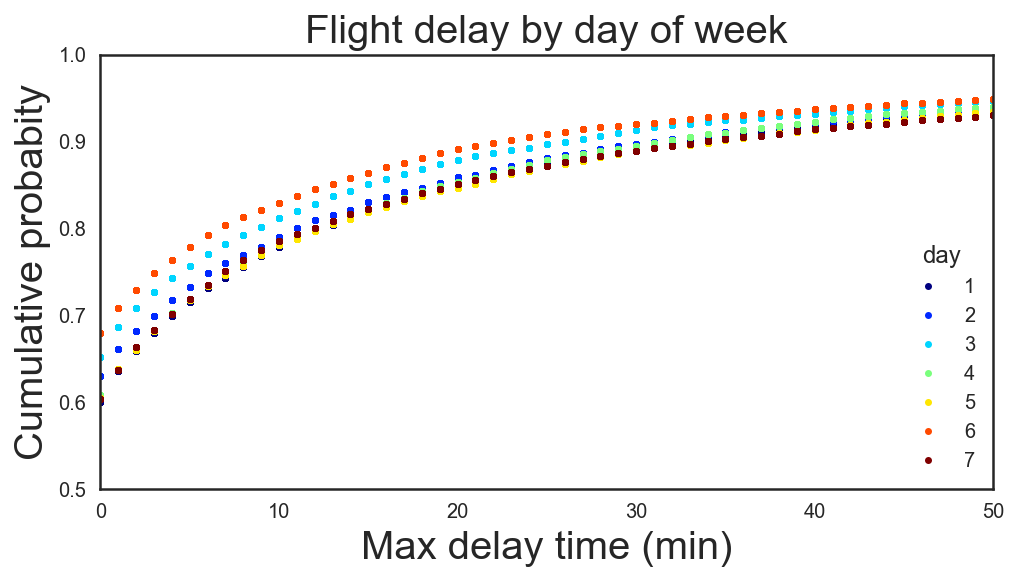

In [7]:
analysis_fn = util.relation_ecdf
analysis_kwargs = {}

plt.figure(figsize=(8,4))
y_by_x_cdf = util.relation_explorer(df_SAN, key_predict, key_feature,
                      analysis_fn = analysis_fn, analysis_kwargs = analysis_kwargs)
plt.xlim((0,50))
plt.ylim((.5,1))
plt.xlabel('Max delay time (min)',size=20)
plt.ylabel('Cumulative probabity', size=20)
plt.legend(fontsize=10,title='day')
plt.title('Flight delay by day of week',size=20)

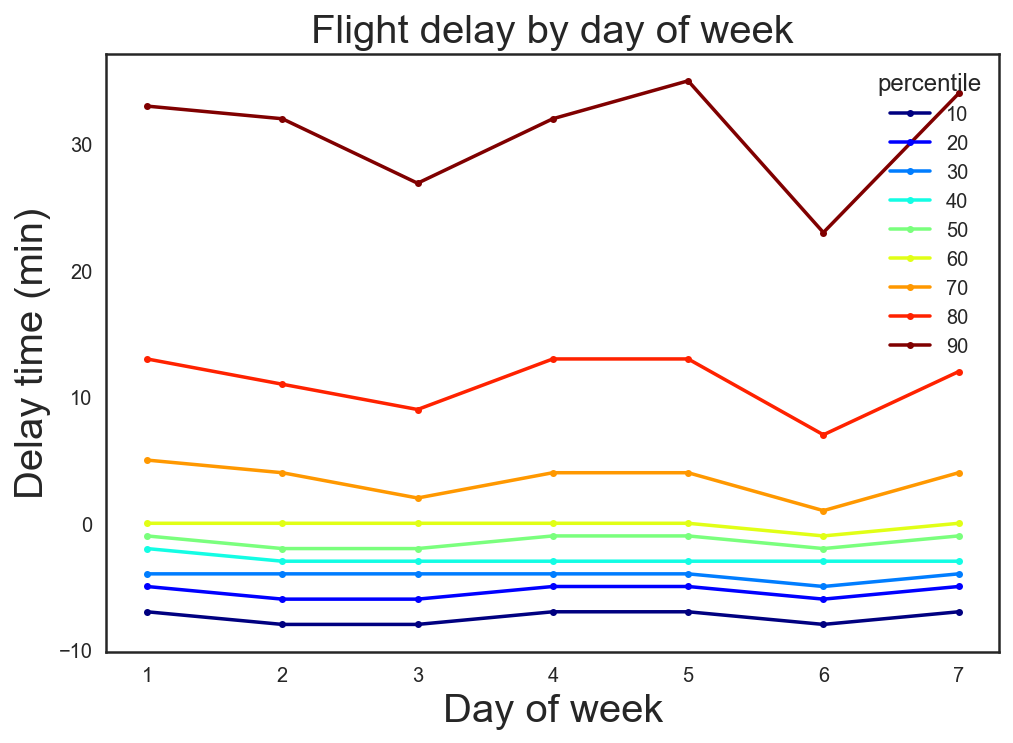

In [8]:
analysis_fn = util.relation_quantiles
analysis_kwargs = {'all_quantiles': np.arange(10,100,10)}
y_by_x_quantile, all_quantiles = util.relation_explorer(df_SAN, key_predict, key_feature,
                      analysis_fn = analysis_fn, analysis_kwargs = analysis_kwargs)
plt.xlabel('Day of week',size=20)
plt.ylabel('Delay time (min)', size=20)
plt.legend(fontsize=10, title='percentile')
plt.title('Flight delay by day of week',size=20)

(0.5, 8.5)

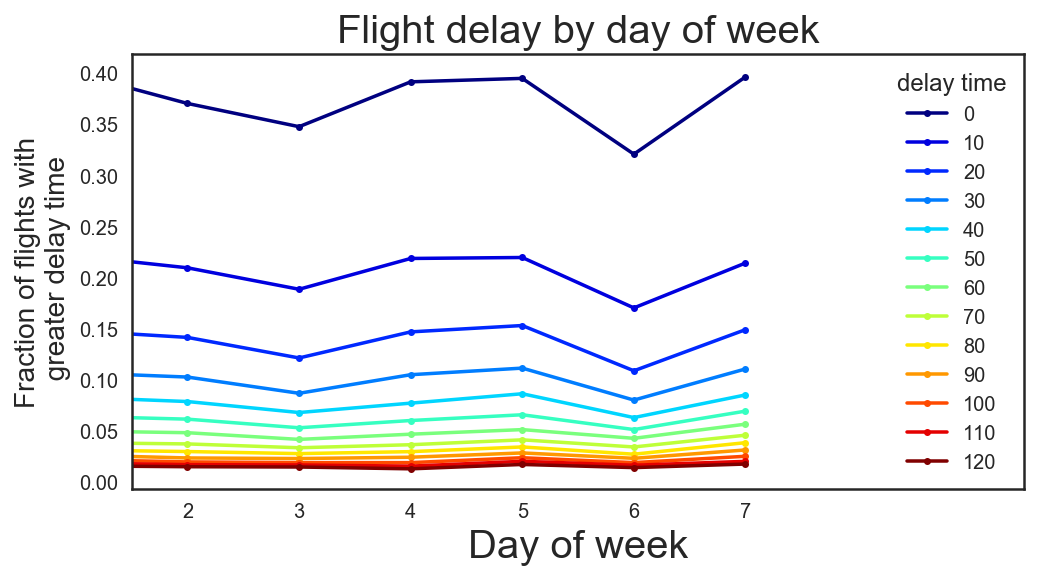

In [9]:
analysis_fn = util.relation_exceed
analysis_kwargs = {'all_min': np.arange(0,130,10)}
plt.figure(figsize=(8,4))
y_by_x_min , all_min = util.relation_explorer(df_SAN, key_predict, key_feature,
                      analysis_fn = analysis_fn, analysis_kwargs = analysis_kwargs)
plt.xlabel('Day of week',size=20)
plt.ylabel('Fraction of flights with\n greater delay time', size=14)
plt.legend(fontsize=10, title='delay time')
plt.title('Flight delay by day of week',size=20)
plt.xlim((.5,8.5))

(0.5, 8.5)

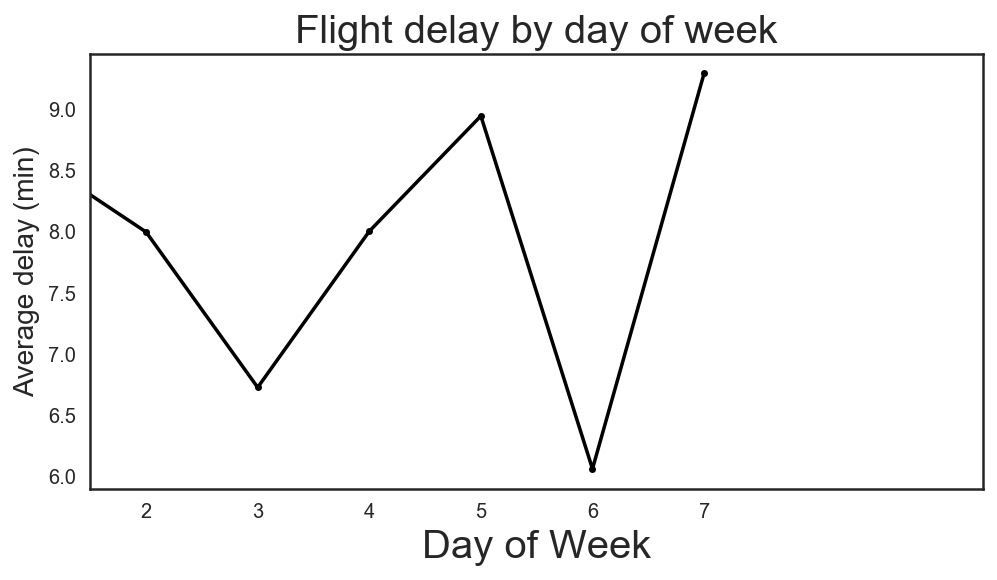

In [10]:
analysis_fn = util.relation_mean
analysis_kwargs = {}
plt.figure(figsize=(8,4))
y_by_x_mean = util.relation_explorer(df_SAN, key_predict, key_feature,
                      analysis_fn = analysis_fn, analysis_kwargs = analysis_kwargs)
plt.xlabel('Day of Week',size=20)
plt.ylabel('Average delay (min)', size=14)
plt.title('Flight delay by day of week',size=20)
plt.xlim((.5,8.5))

# See if day trend is consistent across deciles of data

In [21]:
# Randomize df
np.random.seed(0)
randperm = np.random.permutation(len(df_SAN))
N_df = 5
idx_cutoff = np.linspace(0,len(df_SAN),N_df+1).astype(int)
all_days = range(1,8)
mean_delay = np.zeros((N_df,7))
for i in range(N_df):
    temp_delays = df_SAN['DEPARTURE_DELAY'].values[idx_cutoff[i]:idx_cutoff[i+1]]
    temp_days = df_SAN['DAY_OF_WEEK'].values[idx_cutoff[i]:idx_cutoff[i+1]]
    for d in all_days:
        mean_delay[i,d-1] = np.mean(temp_delays[temp_days==d])

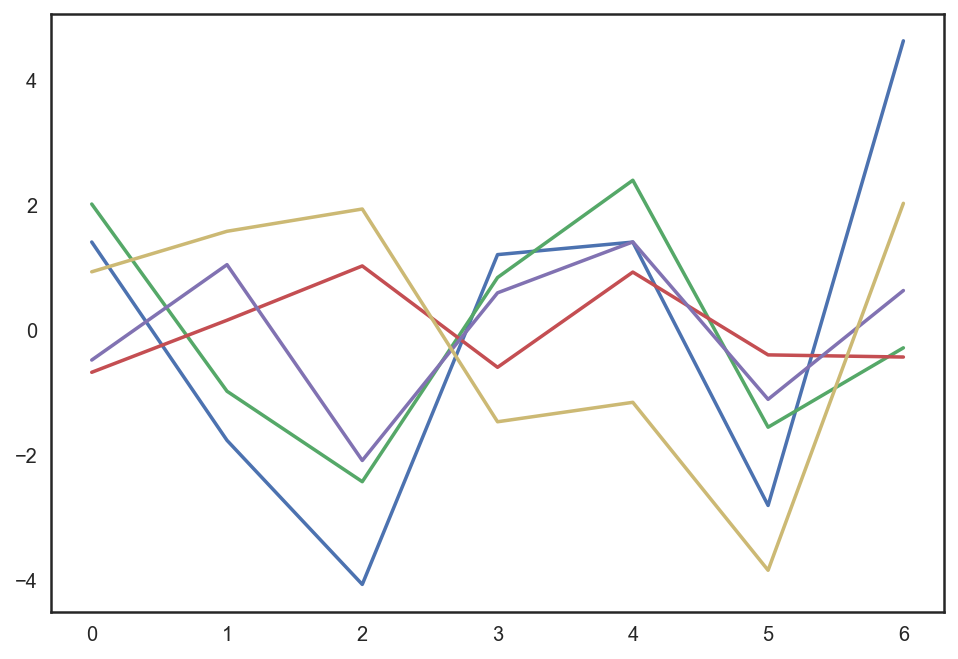

In [22]:
for i in range(N_df):
    plt.plot(mean_delay[i] - np.mean(mean_delay[i]))